<a href="https://colab.research.google.com/github/ascheifer/ascheifer/blob/main/An%C3%A1liseDeDadosEmProcessamentoDeLinguagemNatural_UtilizandoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS EM PROCESSAMENTO DE LINGUAGEM NATURAL UTILIZANDO PYTHON


## Processamento de Linguagem Natural
Resolva os problemas a seguir em equipes de até duas pessoas. A atividade permite consulta ao nosso material e documentação online.

Ao professor se reserva o direito de realizar um teste de autoria de quaisquer uma das atividades a seguir, podendo atribuir nota ZERO ao aluno que não corresponder ao teste exigido.

> **ATENÇÃO**: Não serão aceitas entregas através de links compartilhados do Google Colab. Sua equipe deve entregar um arquivo .ipynb diretamente no AVA (No menu ARQUIVO > FAZER DOWNLOAD você pode criar este arquivo). 





Considere o corpus a seguir:

In [ ]:
# Importando as bibliotecas necessárias
import re
import nltk
from nltk import tokenize
from nltk import sent_tokenize
nltk.download('rslp')
nltk.download('stopwords')
import string
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download()
nltk.download('punkt')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# A seguir um corpus composto por resumos dos primeiros 12 capítulos do livro "Senhor dos Anéis"
# Traduzidos por Luciano Soares e Reinaldo Imrahil - disponível em: https://www.valinor.com.br/82
corpus = [
          "Capítulo 1: Uma festa muito esperada\nSessenta anos passaram desde que Bilbo Bolseiro, o herói de O Hobbit, tinha voltado de sua jornada. Ele é conhecido por muitos, tanto pela sua riqueza legendária como pelo fato de que a idade não parece afetá-lo. Ele anuncia uma grande celebração em honra do 111o aniversário dele e o 33o aniversário do seu sobrinho Frodo, que ele tinha adotado como herdeiro alguns anos atrás e trouxera para viver no Bolsão. A festa estava esplêndida, e um grande número de hobbits foi convidado. Mas Bilbo sentia-se estranho ultimamente, e decidiu que precisava de umas férias e deixaria o Condado; assim, depois de fazer um discurso depois do jantar, na frente dos 144 amigos mais íntimos dele e de Frodo, e também de seus parentes, ele coloca o anel mágico e desaparece, causando grande surpresa. Ele fala mais uma vez com Gandalf antes de partir, e quase muda a sua intenção original de deixar o anel com Frodo; mas o mago o convence a manter a idéia, e Bilbo parte, muito aliviado e mais feliz do que nunca. Gandalf adverte Frodo para não usar o anel. No dia seguinte Frodo está ocupado, pois Bilbo tinha deixado presentes de despedida para muitos hobbits, e agora uma multidão de pessoas se encontra no Bolsão, muitos deles cavando ao redor e procurando os tesouros imaginários de Bilbo. Gandalf parte, e não volta por muito tempo.",
          "Capítulo 2: A Sombra do Passado\nGandalf visita Frodo só algumas vezes pelos anos que seguem. Frodo se acostuma a ser o mestre do Bolsão, e faz amizade com alguns dos hobbits mais jovem [por exemplo com Peregrin Tûk e Merry Brandebuque] enquanto a maioria o considera esquisito, como Bilbo. Rumores de eventos estranhos fora do Condado surgem, como o da ascensão do Poder Escuro na Terra de Mordor, embora a maioria dos hobbits não acreditasse nisso. No qüinquagésimo ano da vida de Frodo, Gandalf o visita novamente e eles têm uma conversa longa sobre o anel que Frodo tinha herdado de Bilbo. Gandalf explica a Frodo a natureza e a história do anel, que é de fato o maior dos Anéis de Poder e foi feito há muito tempo por Sauron, o Senhor do Escuro de Mordor. Sauron o está procurando agora avidamente. Achando o anel o seu poder cresceria imensamente. O anel deveria ser destruído para que Sauron perdesse seu poder, mas só poderia ser destruído em Orodruin, a Montanha da Perdição em Mordor. Parece que Sauron já tinha ouvido falar de Bilbo e do Condado através de Gollum; assim, o Condado provavelmente não é mais um lugar seguro para Frodo. Ele decide partir, acompanhado por Sam Gamgi, o seu jovem jardineiro, que [ao contrário da maioria dos hobbits] acredita nas antigas histórias e adoraria ver os Elfos",
          "Capítulo 3: Três não é demais\nFrodo vende o Bolsão aos Sacola-Bolseiros e compra uma casa na Terra dos Buques, a leste do Condado, onde ele tinha passado sua infância. No seu qüinquagésimo aniversário, ele deixa o Bolsão e parte com seu amigo Pippin [Peregrin Tûk] e Sam Gamgi; Gandalf o deixou por algum tempo para procurar notícias do que acontecia na Terra-média, e ainda não voltou, o que preocupa muito Frodo. No dia seguinte, os três hobbits notam que estão sendo seguidos pelos misteriosos Cavaleiros Negros. Não sabem exatamente quem eles são, e Frodo, cuidadoso, decide não deixar que os Cavaleiros os vejam. Eles conhecem, durante a noite, um grupo vagante de Altos-elfos conduzido por Gildor Inglorion; Frodo fala por muito tempo com Gildor, e o elfo o aconselha a tentar alcançar Valfenda apesar da ausência de Gandalf, e conta-lhe que os Cavaleiros Negros são os perigosos Servos do Inimigo.",
          "Capítulo 4: Um atalho para cogumelos\nNo dia seguinte, Frodo decide pegar um atalho para o rio Brandevin, onde Merry deveria encontrá-los naquele dia; queriam chegar lá mais cedo, e evitar serem vistos novamente pelos Cavaleiros Negros. De fato, eles percebem que um dos Cavaleiros está na estrada e decidem sair dela. Depois de uma passagem longa e desagradável pelos bosques, eles alcançam a propriedade de Fazendeiro Magote, que é conhecido por soltar seus cachorros em qualquer invasor que venha a colher os seus cogumelos [como o próprio Frodo tinha experimentado na sua mocidade]. Contudo, ele é bastante amigável, especialmente por conhecer bastante Pippin; ele conta a Frodo e seus amigos que pouco tempo antes um cavaleiro negro estranho e amedrontador perguntara-lhe por um Bolseiro . Para ajudar Frodo a alcançar a balsa do Brandevin da maneira mais segura e rápida possível, Magote leva os três hobbits com sua carroça , e eles acham Merry esperando-os ansiosamente.",
          "Capítulo 5: Conspiração Desmascarada\nConforme eles cruzam o Rio, notam uma figura negra parada, e cada vez mais próxima. Eles vão para a casa nova de Frodo em Cricôncavo, e falam sobre as suas aventuras na viagem. Frodo pretende falar finalmente para os amigos que vai partir o mais cedo possível quando, para o seu assombro, eles dizem que já sabem sobre o Anel, e sobre o propósito de sua viagem, e que pretendem acompanhá-lo e ajudá-lo. Depois do choque inicial, Frodo aceita a ajuda deles alegremente, e eles decidem partir no dia seguinte, bem cedo, pela Floresta Velha, um lugar conhecido como esquisito e perigoso, para evitar as estradas que provavelmente serão vigiadas pelos Cavaleiros.",
          "Capítulo 6: A Floresta Velha\nOs hobbits entram na Floresta Velha e logo começam a sentir sua estranheza, como se as árvores estivessem vigiando-os e os odiassem. Eles chegam à Clareira onde os hobbits queimaram uma grande quantidade de árvores há muito tempo atrás. De lá, eles seguem um caminho que os conduz a uma colina que sobe fora da Floresta, e de lá, como eles eventualmente notam, para o Rio Withywindle, a parte central e mais estranha da floresta. Eles querem evitar isso e deixar o caminho, mas acham o terreno sempre mais difícil na direção em que gostariam de ir. Eles caem em um barranco que é muito íngreme para ser escalado novamente e, seguindo-o, chegam ao Withywindle e acham um caminho que corre ao longo dele. Este caminho os traz a um velho salgueiro, perto do qual começam a sentir-se sonolentos de repente. Frodo, Merry e Pippin dormem, e a árvore lança Frodo na água e captura Merry e Pippin debaixo de suas raízes. Sam e Frodo não podem salvá-los, e correm ao longo do caminho, enquanto pedem por ajuda, desesperados. Eles encontram Tom Bombadil, um homem estranho que canta canções absurdas. Tom canta a melodia certa, e o salgueiro liberta Merry e Pippin; então Tom convida os hobits para irem à casa dele, onde vive com Fruta DOuro.",
          "Capítulo 7: Na Casa de Tom Bombadil\nEles comem um jantar magnífico e então vão dormir, e cada um deles tem sonhos diferentes e estranhos. No dia os hobbits falam com Tom Bombadil durante o dia inteiro. Tom lhes fala muito sobre a Floresta, os tipos de árvores e animais, o Velho Homem-Salgueiro, e a história antiga da Terra-média, embora de maneira enigmática. Para a surpresa deles, descobrem que o Anel não tem nenhum poder sobre Bombadil. Ele lhes dá conselhos no dia seguinte, e lhes ensina uma rima parra chamá-lo se eles precisarem da ajuda dele.",
          "Capítulo 8: Névoa nas Colinas dos Túmulos\nNo dia seguinte, os hobbits deixam a casa de Tom, pretendendo cruzar os Túmulos. Eles fazem um progresso bom pela manhã, e ao redor de meio-dia param para descansar. Estranhamente há um grande pedra fria que se levanta no topo plano de uma colina. Eles adormecem e são despertados por um pôr-do-sol cercado pela névoa. Eles imediatamente se encaminham na direção que eles acreditam ser a mais direta para a Estrada; algum tempo depois Frodo, que estava na frente, passa entre duas pedras paradas e nota que os outros se foram. Ele começa a gritar por ajuda, e é capturado por uma Criatura Tumular. Ele desperta novamente dentro de um túmulo, nota que os outros estão inconscientes perto dele e que uma mão está rastejando na direção deles. Frodo canta a rima que Tom Bombadil tinha lhes ensinado um dia antes, e realmente Tom vem muito rápido, e a luz do dia destrói a Criatura Tumular. Tom desperta os outros três hobits, e dá a cada um deles uma espada, tirada dos tesouros que estavam dentro do túmulo. Ele também traz os pôneis deles que fugiram à noite, e os acompanha durante algum tempo, até as fronteiras das terras dele. Os hobbits partem, e chegam à aldeia de Bri pela noite.",
          "Capítulo 9: No Pônei Saltitante\nO hobbits entram no Pônei Saltitante, uma hospedaria grande em Bri. Um grupo diversificado de hóspedes já esta reunido lá: hobbits locais e homens, anões em viagem, homens estranhos do Sul, e um Guardião misterioso conhecido como Passolargo. Depois da ceia, Frodo, Sam e Pippin decidem unir-se aos hóspedes; Pippin chama a atenção contando uma história sobre o Prefeito do Condado e, empolgado, começa a contar sobre a festa de despedida de Bilbo. Frodo não quer mencionar o desaparecimento de Bilbo, e para interromper Pippin salta sobre uma mesa e começa a cantar e dançar. Ele salta e cai da mesa, e enquanto cai o Anel desliza para o dedo dele, e ele desaparece. Isto causa muita ansiedade, e apesar das explicações posteriores a maioria dos hóspedes deixa o aposento. Passolargo parece saber o real nome de Frodo, e a verdadeira causa do seu desaparecimento, e lhe pede que tenham uma conversa depois. Carrapicho, o estalajadeiro, também se lembra de algo e pede para ter uma conversa particular com Frodo.",
          "Capítulo 10: Passolargo\nPassolargo vai falar com Frodo, Sam e Pippin. Ele se oferece para ser o guia deles, e parece já saber muito de Frodo; porém, por causa da sua aparência, os hobbits não confiam nele. Então Carrapicho chega e explica que Gandalf tinha deixado uma carta para um certo Frodo Bolseiro, que Carrapicho esquecera de enviar ao Condado há vários meses atrás. Frodo e seus companheiros batem com a descrição que Gandalf dera a Carrapicho, e este dá a carta a Frodo. Entre outras coisas, essa carta contém um conselho de Gandalf para aceitar a ajuda de um amigo seu, um homem chamado Passolargo [com o verdadeiro nome Aragorn], se eles chegassem a conhecê-lo. Assim, Frodo decide aceitar a ajuda dele como um guia para Valfenda. Merry, que saiu para pegar um ar fresco antes, agora volta e conta que viu os Cavaleiros Negros, e parece que eles têm espiões em Bri. Eles decidem não ir para os quartos designados a eles, e dormem no quarto de hóspedes, depois de trancarem as janelas e a porta.",
          "Capítulo 11: Uma Faca no Escuro\nNaquela mesma noite, os Cavaleiros Negros arrombam a casa de Frodo em Cricôncavo, descobrem que Frodo não esta lá, e cavalgam para Bri com grande pressa. Eles arrombam a hospedaria, ou mais especificamente o quarto onde os hóspedes hobbits normalmente dormem. Os hobbits não são descobertos, mas todos os cavalos e pôneis da hospedaria fugiram com medo. No dia seguinte eles compram um pônei e mantimentos [muito mais do que eles poderiam carregar em suas costas]; eles vão em direção a Valfenda, e Passolargo os conduz pela floresta para uma colina chamada Topo do Vento, que oferece uma visão de cima de uma área circunvizinha bem grande. Parece que Gandalf tinha estado lá três dias antes deles. Naquela noite eles são atacados por cinco dos Cavaleiros em uma depressão debaixo do Topo do Vento; Frodo não consegue resistir ao desejo de colocar o Anel, e imediatamente depois de fazer isso percebe que ele pode ver os Cavaleiros muito claramente apesar da escuridão. O capitão dos Cavaleiros ataca Frodo, que o golpeia nos pés mas acaba ferido e perde a consciência .",
          "Capítulo 12: Fuga para o Vau\nPassolargo faz o melhor possível para curar Frodo, mas este só poderia receber o tratamento em Valfenda, que eles deveriam alcançar o mais cedo possível. Eles cruzam o Rio Fontegris e, evitando a estrada, caminham pelos ermos e acabam alcançando a região dos trolls onde Bilbo tivera a sua primeira aventura tantos anos atrás. Eles têm que cruzar uma linha de colinas para se pôr mais perto novamente da Estrada, já que a única esperança deles de alcançar Valfenda a tempo é seguir a Estrada que cruza o rio Ruidoságua, ou Bruinen, no vau de Bruinen. Na Estrada eles conhecem Glorfindel, um Senhor Élfico que foi enviado de Valfenda para achá-los e ajudá-los. Eles se aproximam do Vau de Bruinen e são emboscados pelos Cavaleiros Negros. Frodo consegue escapar e cruzar o rio no cavalo de Glorfindel. Então uma grande inundação vem rio abaixo e leva os Cavaleiros."
]


#### 1) Utilize `Expressões Regulares` para remover de cada um dos textos do corpus o cabeçalho dos capítulos (e.g., "*Capítulo 1:*", "*Capítulo 2*:", "*Capítulo 3*:")

In [ ]:
# Definindo a expressão regular que irá remover as palavras que serão removidas
remover = re.compile(r"Capítulo\s+[123456789101112]:\s+")

# Percorrendo cada palavra do texto do corpus e removendo as palavras encontradas
for i, texto in enumerate(corpus):
    corpus[i] = remover.sub("", texto)

# Mostrando os resultados 
print(corpus)

['Uma festa muito esperada\nSessenta anos passaram desde que Bilbo Bolseiro, o herói de O Hobbit, tinha voltado de sua jornada. Ele é conhecido por muitos, tanto pela sua riqueza legendária como pelo fato de que a idade não parece afetá-lo. Ele anuncia uma grande celebração em honra do 111o aniversário dele e o 33o aniversário do seu sobrinho Frodo, que ele tinha adotado como herdeiro alguns anos atrás e trouxera para viver no Bolsão. A festa estava esplêndida, e um grande número de hobbits foi convidado. Mas Bilbo sentia-se estranho ultimamente, e decidiu que precisava de umas férias e deixaria o Condado; assim, depois de fazer um discurso depois do jantar, na frente dos 144 amigos mais íntimos dele e de Frodo, e também de seus parentes, ele coloca o anel mágico e desaparece, causando grande surpresa. Ele fala mais uma vez com Gandalf antes de partir, e quase muda a sua intenção original de deixar o anel com Frodo; mas o mago o convence a manter a idéia, e Bilbo parte, muito aliviado 

In [ ]:
# Juntando todo o texto em uma nova variável
n_corpus = "".join(corpus)
print (n_corpus)

Uma festa muito esperada
Sessenta anos passaram desde que Bilbo Bolseiro, o herói de O Hobbit, tinha voltado de sua jornada. Ele é conhecido por muitos, tanto pela sua riqueza legendária como pelo fato de que a idade não parece afetá-lo. Ele anuncia uma grande celebração em honra do 111o aniversário dele e o 33o aniversário do seu sobrinho Frodo, que ele tinha adotado como herdeiro alguns anos atrás e trouxera para viver no Bolsão. A festa estava esplêndida, e um grande número de hobbits foi convidado. Mas Bilbo sentia-se estranho ultimamente, e decidiu que precisava de umas férias e deixaria o Condado; assim, depois de fazer um discurso depois do jantar, na frente dos 144 amigos mais íntimos dele e de Frodo, e também de seus parentes, ele coloca o anel mágico e desaparece, causando grande surpresa. Ele fala mais uma vez com Gandalf antes de partir, e quase muda a sua intenção original de deixar o anel com Frodo; mas o mago o convence a manter a idéia, e Bilbo parte, muito aliviado e m

In [ ]:
# Tokeniza o texto
tokens = tokenize.word_tokenize(n_corpus, language='portuguese')
tokens

['Uma',
 'festa',
 'muito',
 'esperada',
 'Sessenta',
 'anos',
 'passaram',
 'desde',
 'que',
 'Bilbo',
 'Bolseiro',
 ',',
 'o',
 'herói',
 'de',
 'O',
 'Hobbit',
 ',',
 'tinha',
 'voltado',
 'de',
 'sua',
 'jornada',
 '.',
 'Ele',
 'é',
 'conhecido',
 'por',
 'muitos',
 ',',
 'tanto',
 'pela',
 'sua',
 'riqueza',
 'legendária',
 'como',
 'pelo',
 'fato',
 'de',
 'que',
 'a',
 'idade',
 'não',
 'parece',
 'afetá-lo',
 '.',
 'Ele',
 'anuncia',
 'uma',
 'grande',
 'celebração',
 'em',
 'honra',
 'do',
 '111o',
 'aniversário',
 'dele',
 'e',
 'o',
 '33o',
 'aniversário',
 'do',
 'seu',
 'sobrinho',
 'Frodo',
 ',',
 'que',
 'ele',
 'tinha',
 'adotado',
 'como',
 'herdeiro',
 'alguns',
 'anos',
 'atrás',
 'e',
 'trouxera',
 'para',
 'viver',
 'no',
 'Bolsão',
 '.',
 'A',
 'festa',
 'estava',
 'esplêndida',
 ',',
 'e',
 'um',
 'grande',
 'número',
 'de',
 'hobbits',
 'foi',
 'convidado',
 '.',
 'Mas',
 'Bilbo',
 'sentia-se',
 'estranho',
 'ultimamente',
 ',',
 'e',
 'decidiu',
 'que',
 'prec

#### 2) Compute a quantidade de caracteres, quantidade de palavras, quantidade de palavras únicas e quantidade de sentenças de cada capítulo e apresente em um `DataFrame` da biblioteca pandas

#### 2.1) Calculando a quantidade de caracteres no texto:

In [ ]:
# Calculando a quabtidade de caracteres no texto:
len(n_corpus)

12225

#### 2.2) Calculando a quantidade de palavras no texto:

In [ ]:
# Calculando a quantidade de palavras no texto:
len(tokens)

2352

#### 2.3) Calculando a quantidade de palavras únicas no texto:

In [ ]:
# Calculando a quantidade de palavras únicas no texto:
len(set(tokens))

764

In [ ]:
# Mostrando a quantidade de vezes que cada palavra se repete no corpus:
from collections import Counter

contador = Counter(tokens)

for cont in contador.items():
  print(cont)

('Uma', 2)
('festa', 3)
('muito', 13)
('esperada', 1)
('Sessenta', 1)
('anos', 4)
('passaram', 1)
('desde', 1)
('que', 58)
('Bilbo', 11)
('Bolseiro', 3)
(',', 154)
('o', 59)
('herói', 1)
('de', 64)
('O', 4)
('Hobbit', 1)
('tinha', 10)
('voltado', 1)
('sua', 10)
('jornada', 1)
('.', 78)
('Ele', 10)
('é', 9)
('conhecido', 4)
('por', 17)
('muitos', 3)
('tanto', 1)
('pela', 6)
('riqueza', 1)
('legendária', 1)
('como', 10)
('pelo', 1)
('fato', 3)
('a', 64)
('idade', 1)
('não', 16)
('parece', 4)
('afetá-lo', 1)
('anuncia', 1)
('uma', 26)
('grande', 9)
('celebração', 1)
('em', 15)
('honra', 1)
('do', 28)
('111o', 1)
('aniversário', 3)
('dele', 8)
('e', 108)
('33o', 1)
('seu', 9)
('sobrinho', 1)
('Frodo', 42)
('ele', 8)
('adotado', 1)
('herdeiro', 1)
('alguns', 2)
('atrás', 4)
('trouxera', 1)
('para', 32)
('viver', 1)
('no', 10)
('Bolsão', 5)
('A', 1)
('estava', 2)
('esplêndida', 1)
('um', 31)
('número', 1)
('hobbits', 17)
('foi', 3)
('convidado', 1)
('Mas', 1)
('sentia-se', 1)
('estranho', 3)

In [ ]:
# Realizando o Stemming e a normalização para lowercase no texto do corpus
def Stemming(n_corpus):
  stemmer = nltk.stem.RSLPStemmer()
  novo_texto = []
  for token in n_corpus:
    novo_texto.append(stemmer.stem(token.lower()))
  return novo_texto

tokensStem = Stemming(tokens)


textoLower = texto.lower()
# Tokeniza o texto
tokensLower = tokenize.word_tokenize(textoLower, language='portuguese')

In [ ]:
# Mostrando novamente a quantidade de palavras únicas no texto:
qtd_palavras_unicas = len(set(tokensStem))
print (qtd_palavras_unicas)

573


#### 2.4) Calculando o número de sentenças no texto:

In [ ]:
# Realizando a Segmentação de Sentenças, a partir de pontuações ou quebra de linhas encontradas no texto do corpus:
sents = sent_tokenize(n_corpus)
sents

['Uma festa muito esperada\nSessenta anos passaram desde que Bilbo Bolseiro, o herói de O Hobbit, tinha voltado de sua jornada.',
 'Ele é conhecido por muitos, tanto pela sua riqueza legendária como pelo fato de que a idade não parece afetá-lo.',
 'Ele anuncia uma grande celebração em honra do 111o aniversário dele e o 33o aniversário do seu sobrinho Frodo, que ele tinha adotado como herdeiro alguns anos atrás e trouxera para viver no Bolsão.',
 'A festa estava esplêndida, e um grande número de hobbits foi convidado.',
 'Mas Bilbo sentia-se estranho ultimamente, e decidiu que precisava de umas férias e deixaria o Condado; assim, depois de fazer um discurso depois do jantar, na frente dos 144 amigos mais íntimos dele e de Frodo, e também de seus parentes, ele coloca o anel mágico e desaparece, causando grande surpresa.',
 'Ele fala mais uma vez com Gandalf antes de partir, e quase muda a sua intenção original de deixar o anel com Frodo; mas o mago o convence a manter a idéia, e Bilbo pa

In [ ]:
# Removendo strings vazias das sentenças
sents = list(filter(lambda x: x.strip() != "", sents))

In [ ]:
qtd_sentencas = len(sents)
print("A quantidade de sentenças no texto é:", qtd_sentencas)

A quantidade de sentenças no texto é: 78


#### 2.5) Apresentando o DataFrame no Pandas

In [ ]:
resultado = {'Qtd_caracteres': ['12225'],
             'Qtd_palavras': ['2352'],
             'Qtd_palavras_únicas': ['573'],
             'Qtd_sentenças': ['78']}

df = pd.DataFrame(resultado)
print (df.loc[0])


Qtd_caracteres         12225
Qtd_palavras            2352
Qtd_palavras_únicas      573
Qtd_sentenças             78
Name: 0, dtype: object


#### 3) Apresente um gráfico de barras comparando a quantidade de palavras únicas de cada capítulo

In [ ]:
# Criando tabela de frequências com a quantidade de palavras únicas por capítulo
qtd_palavras_unicas = tokenize.word_tokenize(texto, language='portuguese')
word_dist = nltk.FreqDist(qtd_palavras_unicas)

df = pd.DataFrame(word_dist.most_common(12), columns=['Palavras Únicas', 'Frequencia'])
print(df)

   Palavras Únicas  Frequencia
0                ,           8
1                o           7
2                .           7
3                e           6
4                a           6
5               de           6
6              que           5
7             para           4
8         Valfenda           3
9             Eles           3
10         Estrada           3
11             rio           3


<Axes: xlabel='Palavras Únicas'>

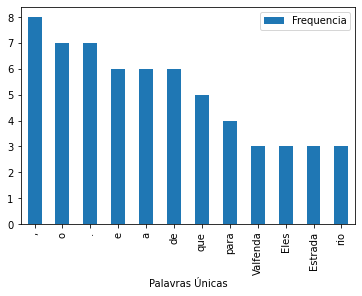

In [ ]:
# Apresentando o gráfico de barras com base nos valores da tabela acima:
df.plot(kind='bar',x='Palavras Únicas', y='Frequencia')

#### 4) Imagine que durante o processo de sumarização/tradução dos textos, os dois revisores participantes referenciaram a palavra "hobbits" de maneira errada em algumas partes do texto, colocando a grafia "hobits" no lugar. Faça um programa que utilizando o algoritmo de **distância de Levenshtein**, encontre e imprima em quais capítulos são encontrados os erros de grafia. 

In [ ]:
m = re.findall(r"(hobits\s*.*)", n_corpus)
m

['hobits para irem à casa dele, onde vive com Fruta DOuro.Na Casa de Tom Bombadil',
 'hobits, e dá a cada um deles uma espada, tirada dos tesouros que estavam dentro do túmulo. Ele também traz os pôneis deles que fugiram à noite, e os acompanha durante algum tempo, até as fronteiras das terras dele. Os hobbits partem, e chegam à aldeia de Bri pela noite.No Pônei Saltitante']

#### 5) Remova as stop-words do corpus e mostre os vetores resultantes (com suas palavras correspondentes) do processo de BoW.
> DICA: Você pode utilizar um atributo da própria função [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)



In [ ]:
# Removendo as stop-words do texto:
def removeStopWords(novo_texto):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    novotexto = []
    for token in novo_texto:
        if token.lower() not in stopwords:
            novotexto.append(token)
    return novotexto

tokensStop = removeStopWords(tokenize.word_tokenize(texto, language='portuguese'))

In [ ]:
# Mostrando a quantidade de tokens no texto:
len(tokensStop)

103

In [ ]:
# Cria instância de CountVectorizer
vect = CountVectorizer()


In [ ]:
# Transforma o corpus em vetores numéricos (Bow)
X = vect.fit_transform(corpus)
X 

<12x717 sparse matrix of type '<class 'numpy.int64'>'
	with 1305 stored elements in Compressed Sparse Row format>

In [ ]:
# Imprime a ordem de cada coluna
print(vect.get_feature_names_out())

['10' '11' '111o' '12' '144' '33o' 'abaixo' 'absurdas' 'acaba' 'acabam'
 'aceita' 'aceitar' 'acham' 'achando' 'achá' 'acompanha' 'acompanhado'
 'acompanhá' 'aconselha' 'acontecia' 'acostuma' 'acredita' 'acreditam'
 'acreditasse' 'adoraria' 'adormecem' 'adotado' 'adverte' 'afetá' 'agora'
 'ainda' 'ajuda' 'ajudar' 'ajudá' 'alcançam' 'alcançando' 'alcançar'
 'aldeia' 'alegremente' 'algo' 'algum' 'algumas' 'alguns' 'aliviado'
 'altos' 'amedrontador' 'amigo' 'amigos' 'amigável' 'amizade' 'anel'
 'animais' 'aniversário' 'ano' 'anos' 'ansiedade' 'ansiosamente' 'antes'
 'antiga' 'antigas' 'anuncia' 'anéis' 'anões' 'ao' 'aos' 'aparência'
 'apesar' 'aposento' 'aproximam' 'ar' 'aragorn' 'arrombam' 'as' 'ascensão'
 'assim' 'assombro' 'ataca' 'atacados' 'atalho' 'atenção' 'através'
 'atrás' 'até' 'ausência' 'aventura' 'aventuras' 'avidamente' 'balsa'
 'barranco' 'bastante' 'batem' 'bem' 'bilbo' 'bolseiro' 'bolseiros'
 'bolsão' 'bom' 'bombadil' 'bosques' 'brandebuque' 'brandevin' 'bri'
 'bruinen' 'b

In [ ]:
# Imprime vetores (Bow)
print(X.toarray())

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


#### 6) Faça um algoritmo que leia uma palavra do usuário e em seguida mostre o capítulo mais relevante a pesquisa, juntamente ao correspondente valor de pontuação TF-IDF da palavra buscada no documento.

In [ ]:
palavra = input("Buscar por: ")

Buscar por: festa


In [ ]:
# Criando instãncia
vect = TfidfVectorizer()

In [ ]:
X = vect.fit_transform(corpus)
X

<12x717 sparse matrix of type '<class 'numpy.float64'>'
	with 1305 stored elements in Compressed Sparse Row format>

In [ ]:
print(vect.get_feature_names_out(X))

['10' '11' '111o' '12' '144' '33o' 'abaixo' 'absurdas' 'acaba' 'acabam'
 'aceita' 'aceitar' 'acham' 'achando' 'achá' 'acompanha' 'acompanhado'
 'acompanhá' 'aconselha' 'acontecia' 'acostuma' 'acredita' 'acreditam'
 'acreditasse' 'adoraria' 'adormecem' 'adotado' 'adverte' 'afetá' 'agora'
 'ainda' 'ajuda' 'ajudar' 'ajudá' 'alcançam' 'alcançando' 'alcançar'
 'aldeia' 'alegremente' 'algo' 'algum' 'algumas' 'alguns' 'aliviado'
 'altos' 'amedrontador' 'amigo' 'amigos' 'amigável' 'amizade' 'anel'
 'animais' 'aniversário' 'ano' 'anos' 'ansiedade' 'ansiosamente' 'antes'
 'antiga' 'antigas' 'anuncia' 'anéis' 'anões' 'ao' 'aos' 'aparência'
 'apesar' 'aposento' 'aproximam' 'ar' 'aragorn' 'arrombam' 'as' 'ascensão'
 'assim' 'assombro' 'ataca' 'atacados' 'atalho' 'atenção' 'através'
 'atrás' 'até' 'ausência' 'aventura' 'aventuras' 'avidamente' 'balsa'
 'barranco' 'bastante' 'batem' 'bem' 'bilbo' 'bolseiro' 'bolseiros'
 'bolsão' 'bom' 'bombadil' 'bosques' 'brandebuque' 'brandevin' 'bri'
 'bruinen' 'b

In [ ]:
print(X.toarray())

[[0.         0.         0.0732935  ... 0.         0.0732935  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08844305 0.         0.         ... 0.         0.         0.        ]
 [0.         0.08611077 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.08889472]]


In [ ]:
# Pegando o vetor do primeiro documento
primeiroDocVec = X[0]

# Mostra os valores em um DataFrame do pandas
pd.set_option('display.max_rows', None)
df = pd.DataFrame(primeiroDocVec.T.todense(), index=vect.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"], ascending=False)

,tfidf
de,0.331783
bilbo,0.249541
muitos,0.219880
ele,0.161089
frodo,0.137823
gandalf,0.135765
que,0.127609
aniversário,0.125891
festa,0.125891
grande,0.123962
